<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Mobile-Range-Prediction.-/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

#Data Description -
* Battery_power - Total energy a battery can store in one time measured in mAh
* Blue - Has bluetooth or not
* Clock_speed - speed at which microprocessor executes instructions
* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are
* Three_g - Has 3G or not
* Touch_screen - Has touch screen or not
* Wifi - Has wifi or not
* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [1]:
# Import all required modules
import pandas as pd
import numpy as np

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
df=pd.read_csv("/content/drive/MyDrive/Alma better Projects/Mobile price prediction/Copy of data_mobile_price_range.csv")

#Understanding Data set

In [158]:
print(df.shape)
df.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [159]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


I can see the minnimum value for columns 'sc_w' (screen width) and for 'px_height' is 0, which is not possible in real life. We need handle these discrepencies in data and will have to replace these values.

#KNN Imputer

In [161]:
# check in how many rows sc_w is 0
df['sc_w']=df['sc_w'].replace(0,np.nan)
df.isnull().sum()

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [162]:
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors=1)
df_filled=impute.fit_transform(df[["sc_w","sc_h"]])
df_filled
Imputed_df = pd.DataFrame(df_filled, columns = ['sc_w','sc_h'])
df.drop(['sc_h','sc_w'], axis=1 ,inplace=True)
Imputed_df

,sc_w,sc_h
0,7.0,9.0
1,3.0,17.0
2,2.0,11.0
3,8.0,16.0
4,2.0,8.0
...,...,...
1995,4.0,13.0
1996,10.0,11.0
1997,1.0,9.0
1998,10.0,18.0


In [164]:
df1 = pd.concat([df, Imputed_df], axis=1)
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_w,sc_h
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,19,0,0,1,1,7.0,9.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,7,1,1,0,2,3.0,17.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,9,1,1,0,2,2.0,11.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,11,1,0,0,2,8.0,16.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,15,1,1,0,1,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,19,1,1,0,0,4.0,13.0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,16,1,1,1,2,10.0,11.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,5,1,1,0,3,1.0,9.0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,19,1,1,1,0,10.0,18.0


In [138]:
#diagonal = √( a2 + b2)==Screen size
# df['screen_size'] = ((Imputed_df['sc_h']**2)+(Imputed_df['sc_w']**2))**0.5

# df.drop(['sc_h','sc_w'], axis=1 ,inplace=True)

In [139]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [140]:
for i in df:
  print(i)
  print(df[i].unique(),"\n")
  

battery_power
[ 842 1021  563 ... 1139 1467  858] 

blue
[0 1] 

clock_speed
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7] 

dual_sim
[0 1] 

fc
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19] 

four_g
[0 1] 

int_memory
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62] 

m_dep
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2] 

mobile_wt
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 12

In [165]:
# categorical and continuous separation

categoricals = [ 'blue',  'dual_sim',  'four_g',
         'three_g', 'touch_screen', 'wifi', 'n_cores']

continuous = ['battery_power','clock_speed','fc','int_memory','m_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time','sc_w','sc_h']

In [166]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#Checking colinearity in continuous variables

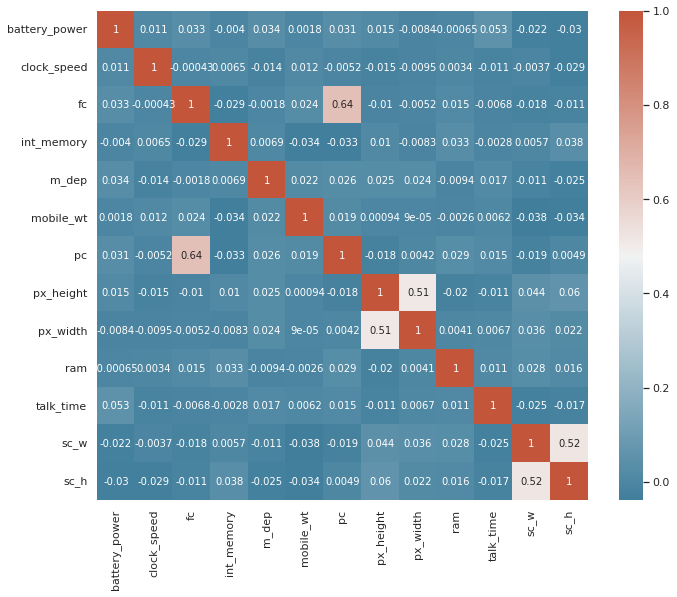

In [145]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[continuous].corr(), annot=True, cmap=cmap)
plt.show()

There is some colinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

In [ ]:
# make single feature out of px_height and px_width.
# df['pixels'] = df['px_height']*df['px_width']
#drop px_height,px_width
# df.drop(['px_height', 'px_width'], axis=1, inplace=True)

#Target

In [73]:
#Target 
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

#Splitting the data

In [180]:
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range', 'sc_w', 'sc_h'],
      dtype='object')

In [181]:
from sklearn.model_selection import train_test_split
X=df1.drop('price_range',axis=1)
y=df1['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

In [182]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train test shape
X_train.shape, X_test.shape

((1340, 20), (660, 20))

#Modellinng

##**Training KNN Model**

In [149]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=0)
knn.fit(X_train,y_train)

ValueError: ignored

#####**Elbow Method For optimum value of K**

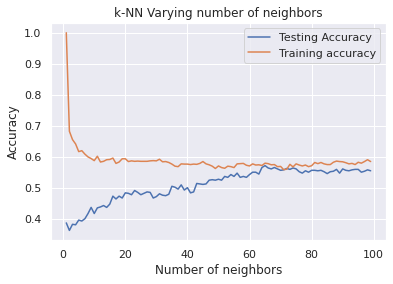

In [197]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k above 20. So lets create a KNeighborsClassifier with number of neighbors as 23

In [184]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [185]:
knn_cv.best_score_
knn_cv.best_params_

{'n_neighbors': 11}

In [186]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, param_grid = hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)

In [187]:
best_model

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [130]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=23,p=1)
#Fit the model
knn.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.64

##KNN

In [204]:
#Without Hyper Parameters Tuning
#1-4,kNearestNeighbors
#importing module
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_neighbors=65)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.5712121212121212
Confusion Metrix:
 [[127  65  21   1]
 [ 18  64  34   7]
 [  6  42  74  46]
 [  0   5  38 112]]


###KNN Hyperparameter tuning

In [205]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[65],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 65, 'weights': 'distance'}
Accuracy: 0.5712121212121212
Confusion Metrix:
 [[120  59  18   0]
 [ 20  64  30   6]
 [ 11  45  79  46]
 [  0   8  40 114]]


#SVM

In [190]:
#Without Hyper Parameters Tuning
#1-3,SVM
#importing module
from sklearn import svm
#making the instance
model = svm.SVC(random_state=123)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8545454545454545
Confusion Metrix:
 [[137  11   0   0]
 [ 14 146  20   0]
 [  0  19 134  19]
 [  0   0  13 147]]


###SVM Hyperparameter tunning

In [191]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'C': 12, 'kernel': 'linear'}
Accuracy: 0.9651515151515152
Confusion Metrix:
 [[149   7   0   0]
 [  2 167   8   0]
 [  0   2 155   0]
 [  0   0   4 166]]


#Random forest


In [192]:
#Without Hyper Parameters Tuning
#1-2,Randomforest
#importing module
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier(n_jobs=-1,random_state=123)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8590909090909091
Confusion Metrix:
 [[146  19   0   0]
 [  5 138  23   0]
 [  0  19 129  12]
 [  0   0  15 154]]


##Random Forest Hyper parametr Tuning

In [193]:
#With Hyper Parameters Tuning
#2-2,Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.8469696969696969
Confusion Metrix:
 [[146  21   0   0]
 [  5 137  27   0]
 [  0  18 124  14]
 [  0   0  16 152]]
